In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and check data
data = pd.read_csv("/content/high-school-directory.csv")

display(f"Dataset shape: {data.shape}")
print(data.head())

'Dataset shape: (435, 69)'

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ... Council District Census Tract

In [9]:
# Duplicates
data.duplicated().sum()

np.int64(0)

In [10]:
# Check data types and missing values
print("\nData types and missing values:")
missing_info = pd.DataFrame({
    'Column': data.columns,
    'Data_Type': data.dtypes,
    'Missing_Count': data.isnull().sum()})
print(missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))


Data types and missing values:
                                              Column Data_Type  Missing_Count
priority09                                priority09    object            434
priority08                                priority08    object            434
priority10                                priority10    object            434
priority07                                priority07    object            431
priority06                                priority06    object            418
expgrade_span_min                  expgrade_span_min   float64            404
expgrade_span_max                  expgrade_span_max   float64            402
priority05                                priority05    object            396
online_ap_courses                  online_ap_courses    object            371
partner_financial                  partner_financial    object            363
online_language_courses      online_language_courses    object            362
school_type                     

In [11]:
# Check distribution
print(data.describe())

       grade_span_min  grade_span_max  expgrade_span_min  expgrade_span_max  \
count      435.000000      435.000000          31.000000          33.000000   
mean         8.445977       11.894253           8.516129          12.363636   
std          1.161479        0.421583           1.121635           0.783349   
min          6.000000        9.000000           6.000000          12.000000   
25%          9.000000       12.000000           9.000000          12.000000   
50%          9.000000       12.000000           9.000000          12.000000   
75%          9.000000       12.000000           9.000000          12.000000   
max          9.000000       12.000000           9.000000          14.000000   

           postcode  total_students  number_programs  community_board  \
count    435.000000      435.000000       435.000000       435.000000   
mean   10726.096552      698.808046         1.708046         6.781609   
std      537.927907      768.566295         1.564233         4.353147

In [12]:
# Cleaning of some columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

numeric_cols = ['total_students','grade_span_min','grade_span_max','community_board','council_district','census_tract']

for col in numeric_cols:
    before_missing = data[col].isnull().sum()
    data[col].fillna(data[col].median(), inplace=True)
    print(f"Filled {before_missing} missing values in {col} with median")

Filled 0 missing values in total_students with median
Filled 0 missing values in grade_span_min with median
Filled 0 missing values in grade_span_max with median
Filled 0 missing values in community_board with median
Filled 0 missing values in council_district with median
Filled 0 missing values in census_tract with median


/tmp/ipython-input-508206233.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [13]:
# Dataframe for Brooklyn
brook_data = data[data["borough"] == "Brooklyn"]
print(brook_data.head())

grade9_schools = brook_data[(brook_data['grade_span_min'] <= 9) &(brook_data['grade_span_max'] >= 9)]
print(f"Number of schools in Brooklyn offering Grade 9 entry: {len(grade9_schools)}")


       dbn                                        school_name   borough  \
1   21K559        Life Academy High School for Film and Music  Brooklyn   
2   16K393     Frederick Douglass Academy IV Secondary School  Brooklyn   
7   17K122  Pathways in Technology Early College High Scho...  Brooklyn   
10  23K644                     Eagle Academy for Young Men II  Brooklyn   
12  15K462                           Secondary School for Law  Brooklyn   

   building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
1           K400  718-333-7750  718-333-7775             9.0              12   
2           K026  718-574-2820  718-574-2821             9.0              12   
7           K625  718-221-1593  718-221-1781             9.0              12   
10          K271  718-495-0863  718-732-2129             6.0              12   
12          K460  718-832-4250  718-499-3947             9.0              12   

    expgrade_span_min  expgrade_span_max  ... council_district censu


Schools by Borough:
borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64


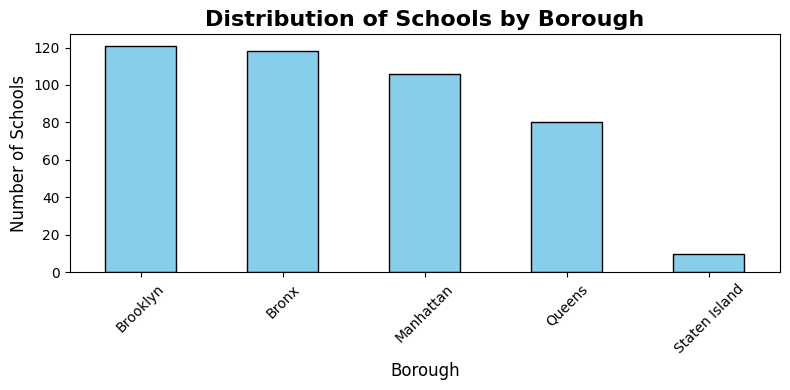

In [14]:
# Borough distribution
print("\nSchools by Borough:")
borough_counts = data['borough'].value_counts()
print(borough_counts)

# Visualize
plt.figure(figsize=(8, 4))
borough_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Schools by Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Students per borough
print("\nStudents per borough:")
students_borough = data.groupby('borough')['total_students'].agg(['sum', 'mean','median']).round(2).sort_values('sum', ascending=False)
print(students_borough)


Students per borough:
                   sum     mean  median
borough                                
Brooklyn       84118.0   695.19   428.0
Queens         81387.0  1017.34   595.0
Manhattan      62133.5   586.17   449.5
Bronx          57868.0   490.41   432.0
Staten Island  18475.0  1847.50  1533.0


In [ ]:
summary = data.groupby('borough')['grade_span_max'].agg(['count', 'min', 'max', 'mean'])
print("\nGrade span summary:")
print(summary)


Grade span summary:
               count  min  max       mean
borough                                  
Bronx            118    9   12  11.906780
Brooklyn         121    9   12  11.933884
Manhattan        106    9   12  11.877358
Queens            80   10   12  11.825000
Staten Island     10   12   12  12.000000


In [16]:
summary = data.groupby('borough')['grade_span_max'].describe()
print("\nGrade span summary:")
print(summary)


Grade span summary:
               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


In [ ]:
# AP Courses Analysis
ap_available = data['advancedplacement_courses'].notna().sum()
print(f"\nSchools offering AP courses: {ap_available} ({ap_available/len(data)*100:.1f}%)")

# AP by borough
ap_by_borough = data.groupby('borough')['advancedplacement_courses'].apply(lambda x: x.notna().sum())
ap_rate_by_borough = (ap_by_borough / borough_counts * 100).round(1)
print("\nAP course availability by borough:")
for borough, rate in ap_rate_by_borough.items():
    print(f"{borough}: {rate}%")

# Language courses
lang_available = data['language_classes'].notna().sum()
print(f"\nSchools offering language classes: {lang_available} ({lang_available/len(data)*100:.1f}%)")

# Sports programs analysis
sports_cols = ['psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports']
sports_data = {}
for col in sports_cols:
      sports_data[col] = data[col].notna().sum()

print("\nSports programs availability:")
for sport_type, count in sports_data.items():
    print(f"{sport_type}: {count} schools ({count/len(data)*100:.1f}%)")



Schools offering AP courses: 340 (78.2%)

AP course availability by borough:
Bronx: 73.7%
Brooklyn: 76.9%
Manhattan: 80.2%
Queens: 81.2%
Staten Island: 100.0%

Schools offering language classes: 412 (94.7%)

Sports programs availability:
psal_sports_boys: 373 schools (85.7%)
psal_sports_girls: 373 schools (85.7%)
psal_sports_coed: 147 schools (33.8%)
school_sports: 297 schools (68.3%)



School Type Analysis:
school_type
CTE School                          36
Consortium School                   17
International School                12
Specialized School                   9
All-Girls School                     8
New School                           6
NYC P-Tech 9-14 School               3
All-Boys School                      3
NYC P-Tech 9-14, New School          3
Consortium, International School     3
CTE - New School                     2
CTE, New School                      1
CTE, International School            1
Name: count, dtype: int64

Unique Schools per Borough:
borough
Queens           11
Brooklyn         10
Bronx             9
Manhattan         9
Staten Island     2
Name: school_type, dtype: int64

School Size Analysis:
size_category
Medium (300-600)      260
Very Large (>1000)     63
Small (<300)           61
Large (600-1000)       51
Name: count, dtype: int64


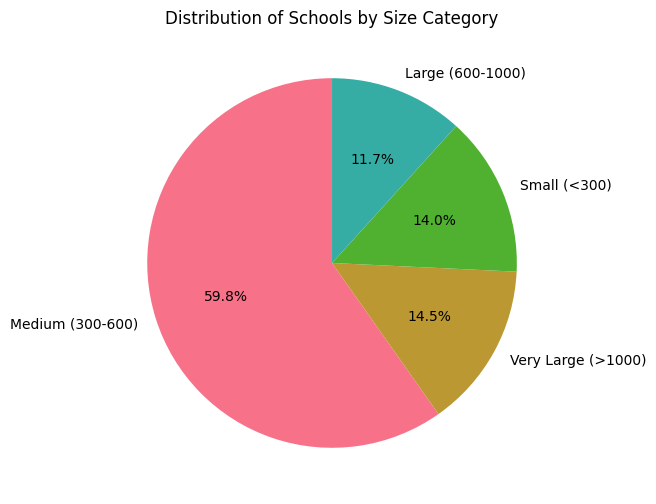

In [ ]:
# School size categories
print("\nSchool Type Analysis:")
school_types = data['school_type'].value_counts()
print(school_types)
print("\nUnique Schools per Borough:")
print(data.groupby("borough")["school_type"].nunique().sort_values(ascending=False))

print("\nSchool Size Analysis:")
data['size_category'] = pd.cut(data['total_students'], bins=[0, 300, 600, 1000, float('inf')], labels=['Small (<300)','Medium (300-600)','Large (600-1000)','Very Large (>1000)'])

size_dist = data['size_category'].value_counts()
print(size_dist)

plt.figure(figsize=(10, 6))
size_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Schools by Size Category')
plt.ylabel('')
plt.show()

In [ ]:
# Bus transportation
bus_available = data['bus'].notna().sum()
print(f"Schools with bus service: {bus_available} ({bus_available/len(data)*100:.1f}%)")

# Subway access
subway_available = data['subway'].notna().sum()
print(f"Schools with subway access: {subway_available} ({subway_available/len(data)*100:.1f}%)")

# Transportation by borough
transport_by_borough = data.groupby('borough').agg({'bus': lambda x: x.notna().sum(),'subway': lambda x: x.notna().sum()}).round(2)
print("\nTransportation by borough:")
transport_by_borough['total_schools'] = borough_counts
transport_by_borough['bus_percentage'] = (transport_by_borough['bus'] / transport_by_borough['total_schools'] * 100).round(1)
transport_by_borough['subway_percentage'] = (transport_by_borough['subway'] / transport_by_borough['total_schools'] * 100).round(1)
print(transport_by_borough[['bus_percentage', 'subway_percentage']])


Schools with bus service: 434 (99.8%)
Schools with subway access: 358 (82.3%)

Transportation by borough:
               bus_percentage  subway_percentage
borough                                         
Bronx                   100.0               83.1
Brooklyn                100.0               87.6
Manhattan                99.1               98.1
Queens                  100.0               57.5
Staten Island           100.0               40.0


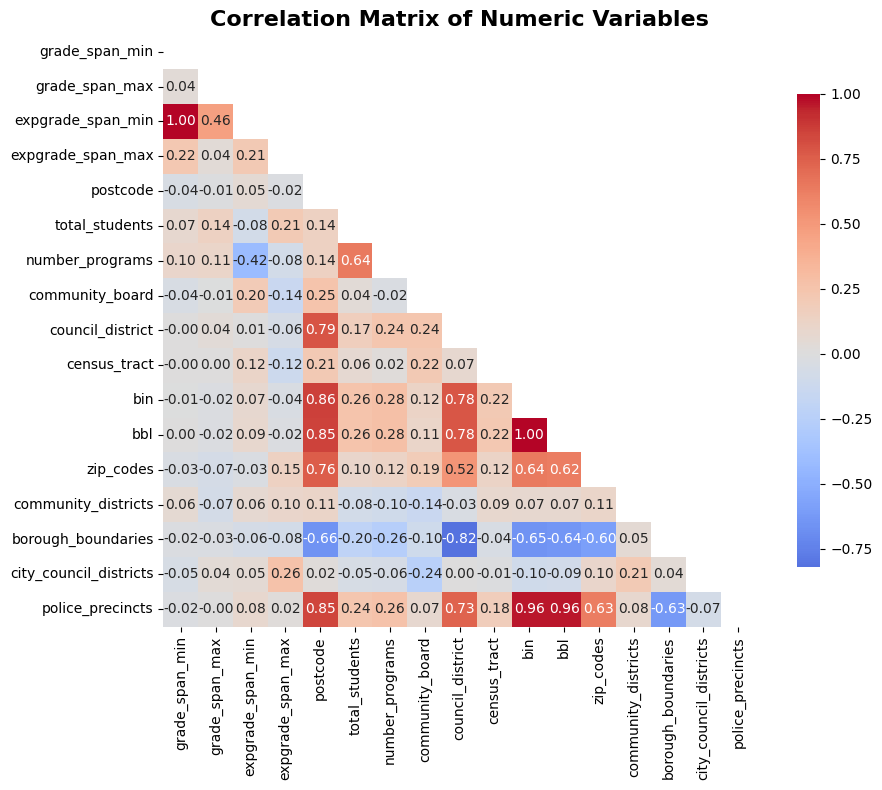

In [ ]:
# Select numeric columns for correlation
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## NYC Public Schools – Summary Highlights

### Overview

* **Total Schools**: 435
* **Total Students**: 303,981
* **Boroughs Covered**: 5

### Borough Breakdown

* **Most Schools**: Brooklyn (121)
* **Fewest Schools**: Staten Island (10)
* **Highest Avg. Students**: Staten Island (1,847.5)
* **Lowest Avg. Students**: Bronx (490.4)

### Programs

* **AP Courses**: 78.2% of schools

  * Highest: Staten Island (100%)
  * Lowest: Bronx (73.7%)
* **Language Classes**: 94.7% of schools

### Sports

* **Boys/Girls PSAL**: 85.7% of schools
* **Coed Sports**: 33.8%
* **Any Sports Program**: 68.3%

### Transportation

* **Bus Access**: 99.8%
* **Subway Access**: 82.3%

  * Highest: Manhattan (98.1%)
  * Lowest: Staten Island (40%)

### School Types & Sizes

* **Most Common Type**: CTE Schools
* **Most Common Size**: Medium (300–600 students)


________________________________________________________________________________

Additional Answers

    How many total schools are in Brooklyn?
    121 schools

    How many offer Grade 9 entry in Brooklyn?
    121 schools

    Count of schools per borough:
    Brooklyn: 121
    Bronx: 118
    Manhattan: 106
    Queens: 80
    Staten Island: 10

    Average number of students per borough:
    Brooklyn: 695.19
    Queens: 1017.34
    Manhattan: 586.17
    Bronx: 490.41
    Staten Island: 1847.5

    Summary of grade_span_max grouped by borough:

| Borough       | Count | Mean  | Std Dev | Min  | 25%  | Median | 75%  | Max  |
| ------------- | ----- | ----- | ------- | ---- | ---- | ------ | ---- | ---- |
| Bronx         | 118   | 11.91 | 0.37    | 9.0  | 12.0 | 12.0   | 12.0 | 12.0 |
| Brooklyn      | 121   | 11.93 | 0.38    | 9.0  | 12.0 | 12.0   | 12.0 | 12.0 |
| Manhattan     | 106   | 11.88 | 0.47    | 9.0  | 12.0 | 12.0   | 12.0 | 12.0 |
| Queens        | 80    | 11.83 | 0.50    | 10.0 | 12.0 | 12.0   | 12.0 | 12.0 |
| Staten Island | 10    | 12.00 | 0.00    | 12.0 | 12.0 | 12.0   | 12.0 | 12.0 |

